## 스타벅스 이벤트 관련 고객 설문 데이터

- 스타벅스 고객들의 이벤트 관련 설문에 응답한 데이터의 일부입니다.


- 해당 데이터에서 고객들이 이벤트에 대한 응답을 어떻게 하는지, 찾고 고객 프로모션 개선방안에 대한 인사이트를 찾습니다.

### 0. Data Description

1. Profile table

> profile 데이터는 설문에 참여한 스타벅스 회원에 관련된 정보가 담겨 있습니다.


2. transcript

> 이벤트에 참여한 실제 유저들의 응답이 기록되어 있습니다.


3. portfoilo

> 이벤트를 운영했던 내역에 관한 정보가 담겨 있습니다.

### 1. 라이브러리 및 데이터 로드

- 분석에 필요한 데이터와, 라이브러리를 불러옵니다.

In [3]:
pip install pandas

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.0.16_1/libexec/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# 데이터 분석 필수 라이브러리 4종 세트 불러오기
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
COLORS = sns.color_palette()

In [75]:
# Starbucks Customer Data 폴더안에 있는 데이터 3개를 불러오기
transcript = pd.read_csv('Starbucks_Customer_Data/transcript.csv')
profile = pd.read_csv('Starbucks_Customer_Data/profile.csv',index_col='Unnamed: 0',parse_dates=True)
portfolio = pd.read_csv('Starbucks_Customer_Data/portfolio.csv')

### 2. 데이터 전처리

- 결측치가 존재하는 데이터를 찾아서, 결측치를 처리해줍니다.

In [4]:
# 각 데이터에 결측치가 있는지 확인합니다.
transcript.info()
transcript.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  306534 non-null  int64 
 1   person      306534 non-null  object
 2   event       306534 non-null  object
 3   value       306534 non-null  object
 4   time        306534 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.7+ MB


Unnamed: 0    0
person        0
event         0
value         0
time          0
dtype: int64

In [5]:
profile.info()
profile.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        17000 non-null  int64  
 1   gender            14825 non-null  object 
 2   age               17000 non-null  int64  
 3   id                17000 non-null  object 
 4   became_member_on  17000 non-null  int64  
 5   income            14825 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 797.0+ KB


Unnamed: 0             0
gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [6]:
portfolio.info()
portfolio.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10 non-null     int64 
 1   reward      10 non-null     int64 
 2   channels    10 non-null     object
 3   difficulty  10 non-null     int64 
 4   duration    10 non-null     int64 
 5   offer_type  10 non-null     object
 6   id          10 non-null     object
dtypes: int64(4), object(3)
memory usage: 688.0+ bytes


Unnamed: 0    0
reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

In [7]:
transcript

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...,...
306529,306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [8]:
# 결측치를 포함하는 데이터들은 어떤 데이터들인지 확인합니다.
profile.isnull()

,Unnamed: 0,gender,age,id,became_member_on,income
0,False,True,False,False,False,True
1,False,False,False,False,False,False
2,False,True,False,False,False,True
3,False,False,False,False,False,False
4,False,True,False,False,False,True
...,...,...,...,...,...,...
16995,False,False,False,False,False,False
16996,False,False,False,False,False,False
16997,False,False,False,False,False,False
16998,False,False,False,False,False,False


In [9]:
# 결측치를 처리해줍니다. # 평균과 같은 통계량으로 채워주거나, 버립니다.
profile=profile[pd.notnull(profile['income'])]
len(profile)

14825

### 3. profile 데이터 분석

- 설문에 참여한 사람 중, 정상적인 데이터로 판단된 데이터에 대한 분석을 수행합니다.


- 각 column마다 원하는 통계량을 찾은 뒤, 해당 통계량을 멋지게 시각화해 줄 plot을 seaborn에서 가져와 구현합니다.

In [10]:
# profile의 became_member_on 데이터를 시간 정보로 변환해줍니다.
profile.became_member_on = pd.to_datetime(profile.became_member_on.astype(str), format='%Y%m%d')
profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        14825 non-null  int64         
 1   gender            14825 non-null  object        
 2   age               14825 non-null  int64         
 3   id                14825 non-null  object        
 4   became_member_on  14825 non-null  datetime64[ns]
 5   income            14825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 810.7+ KB


#### 성별에 관한 분석

In [11]:
profile

,Unnamed: 0,gender,age,id,became_member_on,income
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
5,5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0
8,8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0
12,12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0
...,...,...,...,...,...,...
16995,16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0
16996,16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0
16997,16997,M,49,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0
16998,16998,F,83,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0


In [12]:
rate_by_gender

NameError: name 'rate_by_gender' is not defined

In [ ]:
rate_by_gender=profile.groupby('gender').count()['id'].sort_values()
rate_by_gender.plot.bar()

분석: 남자의 참여율이 더 높다.

#### 나이에 대한 분석

In [13]:
age=profile['age'].sort_values().reset_index().drop('index',axis=1)
age

,age
0,18
1,18
2,18
3,18
4,18
...,...
14820,101
14821,101
14822,101
14823,101


In [14]:
profile['age'].max()

101

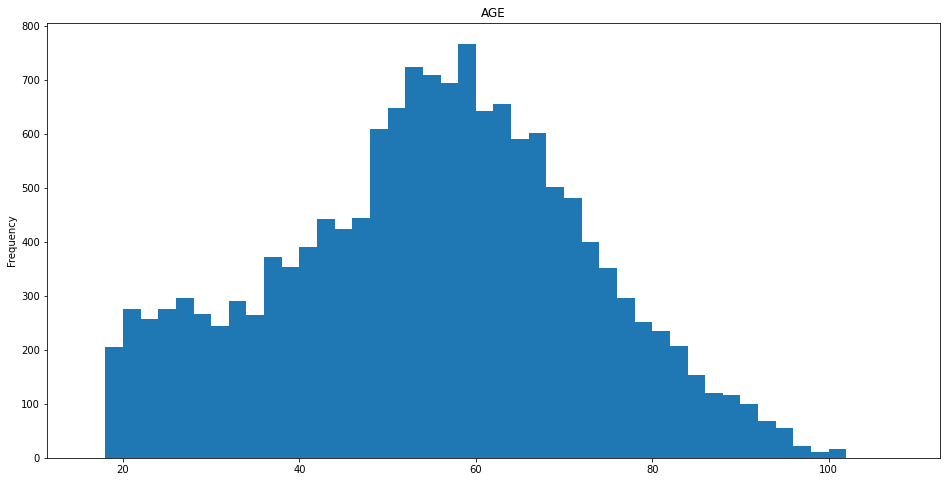

In [15]:
profile['age'].plot.hist(bins=range(16,110,2),figsize=[16,8])
plt.title('AGE')
plt.show()

의견 : 50~60세 구간의 참여율이 가장 높으며 그 후에는 나이순서대로 줄어드는 것으로 보인다.

#### 회원이 된 날짜에 대한 분석

In [16]:
member = profile['became_member_on'].sort_values().reset_index().drop('index', axis=1)
member

,became_member_on
0,2013-07-29
1,2013-07-30
2,2013-07-30
3,2013-07-30
4,2013-07-31
...,...
14820,2018-07-26
14821,2018-07-26
14822,2018-07-26
14823,2018-07-26


#### 연도별 분석

In [17]:
member_by_year = profile.set_index('became_member_on').groupby(lambda date:date.year).count()['id']
member_by_year

became_member_on
2013     274
2014     662
2015    1597
2016    3024
2017    5599
2018    3669
Name: id, dtype: int64

In [18]:
def plot_bar(df, xlabel, ylabel, title, figsize=(20, 10), color=COLORS[-1], rotation=45):
    plot = df.plot(kind='bar', color=color, figsize=figsize)
    plot.set_xlabel(xlabel, fontsize=10)
    plot.set_ylabel(ylabel, fontsize=10)
    plot.set_title(title, fontsize=12)
    plot.set_xticklabels(labels=df.index, rotation=rotation)

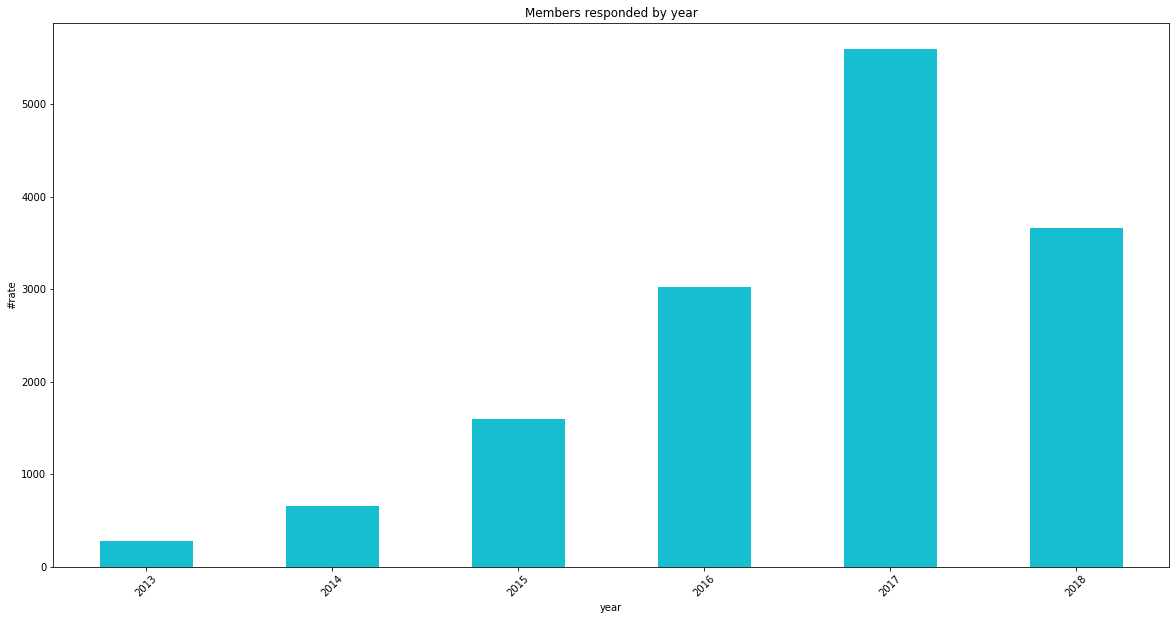

In [19]:
plot_bar(member_by_year, 'year','#rate','Members responded by year')

분석 : 2017년 까지 참여율이 점점 높아졌고, 2018년에 감소하였다.

#### 수입에 대한 분석

In [20]:
income = profile['income'].sort_values()
income

3226      30000.0
7574      30000.0
2211      30000.0
12554     30000.0
13412     30000.0
           ...   
2984     120000.0
3843     120000.0
7513     120000.0
306      120000.0
7467     120000.0
Name: income, Length: 14825, dtype: float64

In [21]:
income.describe()

count     14825.000000
mean      65404.991568
std       21598.299410
min       30000.000000
25%       49000.000000
50%       64000.000000
75%       80000.000000
max      120000.000000
Name: income, dtype: float64

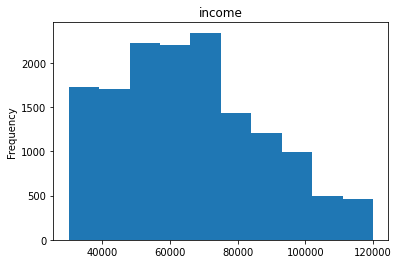

In [22]:
profile['income'].plot.hist()
plt.title('income')
plt.show()

분석 : 수입이 약 5000~7000인 회원들에 빈도가 높으며, 그 이후 부터는 수입과 빈도수가 반비례하는 모습을 보여줍니다.

#### profile 데이터에 대한 상관관계 분석

성별 : 남자가 여자보다 참여율이 높다.<br>
나이 : 50-60세 구간의 참여율이 가장 높으며 그 후에는 나이순서대로 줄어드는 것으로 보인다.<br>
회원이 된 날짜에 대한 분석 (연도별) : 2017년 까지 참여율이 점점 높아졌고, 2018년에 감소하였다.<br>
수입 : 수입이 약 5000~7000인 회원들에 빈도가 높으며, 그 이후 부터는 수입과 빈도수가 반비례하는 모습을 보여줍니다.<br>

### 4. transcript에 대한 분석

- 각 column마다 원하는 통계량을 찾은 뒤, 해당 통계량을 멋지게 시각화해 줄 plot을 seaborn에서 가져와 구현합니다.


- `person`과 `values` column은 분석 대상에서 제외합니다.


> values에 대한 패턴이 궁금하다면, 아래 코드를 참고해보세요 ! (배우지 않은 내용이 있어, 어려울 수 있습니다)

#### event에 대한 분석

In [23]:
rate_by_event = transcript.groupby('event').count()['person'].sort_values()
rate_by_event

event
offer completed     33579
offer viewed        57725
offer received      76277
transaction        138953
Name: person, dtype: int64

In [54]:
transcript['event_count']=transcript['event'](.value_counts())
transcript

,Unnamed: 0,person,event,value,time,event_count
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,NaN
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,NaN
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,NaN
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,NaN
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,NaN
...,...,...,...,...,...,...
306529,306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714,NaN
306530,306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714,NaN
306531,306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714,NaN
306532,306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714,NaN


In [61]:
transcript['event']['transaction']=transcript['event']
transcript

<ipython-input-61-62350d4bb04e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transcript['event']['transaction']=transcript['event']


,Unnamed: 0,person,event,value,time,event_count
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,offer received
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,offer received
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,offer received
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,offer received
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,offer received
...,...,...,...,...,...,...
306529,306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714,transaction
306530,306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714,transaction
306531,306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714,transaction
306532,306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714,transaction


In [70]:
transcript['event']

0         offer received
1         offer received
2         offer received
3         offer received
4         offer received
               ...      
306529       transaction
306530       transaction
306531       transaction
306532       transaction
306533       transaction
Name: event, Length: 306534, dtype: object

In [72]:
transcript['event'].count()

306534

In [79]:
rate_by_event

event
offer completed     33579
offer viewed        57725
offer received      76277
transaction        138953
Name: person, dtype: int64

In [84]:
rate_by_event['transaction'] / transcript['event'].count()

0.45330371182315826

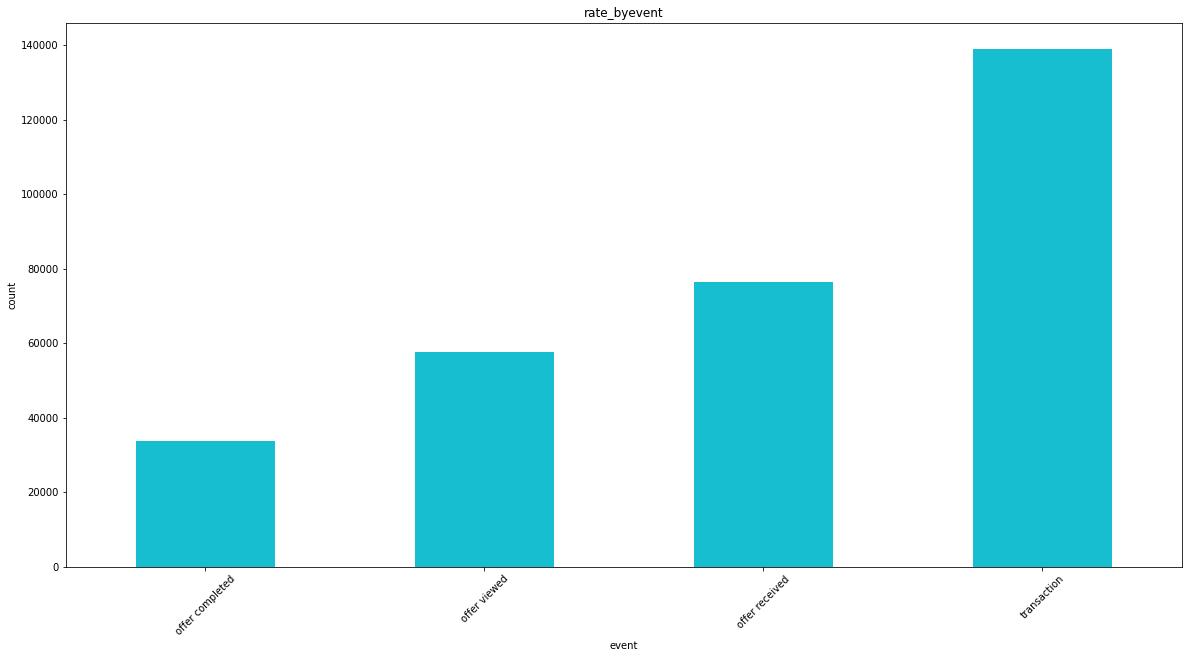

In [83]:
plot_bar(rate_by_event,'event','count','rate_byevent')

분석 : transaction 된 것이 약 14,000건으로 0.45% 이고 그외에 offer 된 것들이 55% 인데 그 중에 어떤 부분에서 이탈이 되었는지 알 수가 있다.

#### time에 대한 분석

In [24]:
rate_by_time = transcript.groupby('time').count()['person'].sort_values()
rate_by_time

time
150      894
162      910
156      914
330      938
318      940
       ...  
168    16150
336    16302
504    16822
576    17015
408    17030
Name: person, Length: 120, dtype: int64

In [39]:
len(transcript)

306534

In [25]:
rate_by_time[30:50]
# 시간에 대한 연관성을 자세히 보기 위해 중간 부분 을 좀 더 찾아봄

time
78     1308
84     1323
696    1326
258    1338
678    1351
72     1373
684    1384
60     1428
246    1433
498    1486
66     1487
54     1519
234    1551
240    1565
672    1595
660    1599
654    1599
48     1610
666    1611
492    1619
Name: person, dtype: int64

In [41]:
transcript['time'].count()

306534

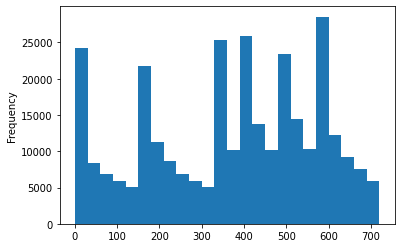

In [45]:
#rate_by_time.plot.hist()
transcript['time'].plot.hist(bins=range(0,750,30))
plt.show()


분석 : 유저(총:306534명)들이 응답에 참여한 시간은 최대 714 이며 응답을 바로 끊은 사람도 약 3000명 중반이다.
    다른 요소와의 연관관계를 확인해 봐야겠으나, time 자체의 수치는 큰 의미를 부여하기 어렵다.
    아마도, event에 따른 수치를 확인해 보는 것이 좋을 듯 하다.

#### (Advanced, optional) value에 대한 분석 

In [55]:
# str로 되어있는 데이터를 dictionary로 변환
transcript.value = transcript.value.apply(lambda x:eval(x))
transcript

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...,...
306529,306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [56]:
list(transcript.value[0].keys())[0]

'offer id'

In [57]:
# event에 따른 value의 차이 확인
transcript["value_key"] = transcript.value.apply(lambda x:list(x.keys())[0])
transcript["value_value"] = transcript.value.apply(lambda x:list(x.values())[0])
transcript

,Unnamed: 0,person,event,value,time,value_key,value_value
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,offer id,2906b810c7d4411798c6938adc9daaa5
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,offer id,fafdcd668e3743c1bb461111dcafc2a4
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,offer id,4d5c57ea9a6940dd891ad53e9dbe8da0
...,...,...,...,...,...,...,...
306529,306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714,amount,1.59
306530,306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714,amount,9.53
306531,306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714,amount,3.61
306532,306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714,amount,3.53


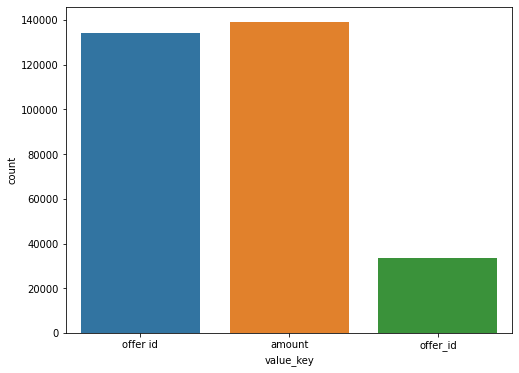

In [58]:
plt.figure(figsize=(8, 6))
sns.countplot(data=transcript, x="value_key")
plt.show()

In [59]:
transcript.value_value.value_counts()

fafdcd668e3743c1bb461111dcafc2a4    20241
2298d6c36e964ae4a3e7e9706d1fb8c2    20139
f19421c1d4aa40978ebb69ca19b0e20d    19131
4d5c57ea9a6940dd891ad53e9dbe8da0    18222
ae264e3637204a6fb9bb56bc8210ddfd    18062
                                    ...  
635.06                                  1
42.51                                   1
124.03                                  1
40.49                                   1
476.33                                  1
Name: value_value, Length: 5113, dtype: int64

In [60]:
temp = transcript.loc[transcript.value_key != "amount", "value_value"]
temp_df = pd.DataFrame({"id" : temp.values})
temp_df

,id
0,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,2906b810c7d4411798c6938adc9daaa5
3,fafdcd668e3743c1bb461111dcafc2a4
4,4d5c57ea9a6940dd891ad53e9dbe8da0
...,...
167576,2298d6c36e964ae4a3e7e9706d1fb8c2
167577,fafdcd668e3743c1bb461111dcafc2a4
167578,0b1e1539f2cc45b7b9fa7c272da2e1d7
167579,fafdcd668e3743c1bb461111dcafc2a4


In [61]:
temp.value_counts()

fafdcd668e3743c1bb461111dcafc2a4    20241
2298d6c36e964ae4a3e7e9706d1fb8c2    20139
f19421c1d4aa40978ebb69ca19b0e20d    19131
4d5c57ea9a6940dd891ad53e9dbe8da0    18222
ae264e3637204a6fb9bb56bc8210ddfd    18062
9b98b8c7a33c4b65b9aebfe6a799e6d9    16202
2906b810c7d4411798c6938adc9daaa5    15767
5a8bc65990b245e5a138643cd4eb9837    14305
0b1e1539f2cc45b7b9fa7c272da2e1d7    13751
3f207df678b143eea3cee63160fa8bed    11761
Name: value_value, dtype: int64

In [62]:
temp_portfolio = pd.merge(temp_df, portfolio, how="left", on="id")
temp_portfolio

,id,Unnamed: 0,reward,channels,difficulty,duration,offer_type
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,3,5,"['web', 'email', 'mobile']",5,7,bogo
1,0b1e1539f2cc45b7b9fa7c272da2e1d7,4,5,"['web', 'email']",20,10,discount
2,2906b810c7d4411798c6938adc9daaa5,9,2,"['web', 'email', 'mobile']",10,7,discount
3,fafdcd668e3743c1bb461111dcafc2a4,6,2,"['web', 'email', 'mobile', 'social']",10,10,discount
4,4d5c57ea9a6940dd891ad53e9dbe8da0,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo
...,...,...,...,...,...,...,...
167576,2298d6c36e964ae4a3e7e9706d1fb8c2,5,3,"['web', 'email', 'mobile', 'social']",7,7,discount
167577,fafdcd668e3743c1bb461111dcafc2a4,6,2,"['web', 'email', 'mobile', 'social']",10,10,discount
167578,0b1e1539f2cc45b7b9fa7c272da2e1d7,4,5,"['web', 'email']",20,10,discount
167579,fafdcd668e3743c1bb461111dcafc2a4,6,2,"['web', 'email', 'mobile', 'social']",10,10,discount


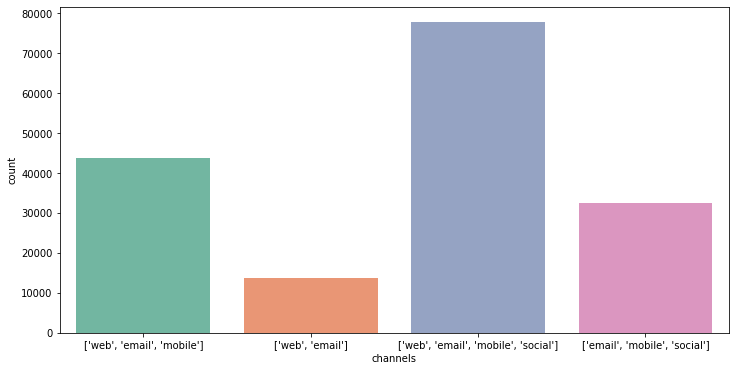

In [63]:
plt.figure(figsize=(12, 6))
sns.countplot(data=temp_portfolio, x="channels", palette="Set2")
plt.show()